<a href="https://colab.research.google.com/github/umSamWeiHong/DepressionModel/blob/master/DepressionIndicator_Wei_Hong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network (Deep Learning)

## Import data and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Group Project/depression.csv')
df

,Code,Age_Numerical,Gender,Marital,Marital_problems,Religion_binary,Religion_help,Med_or_not,Expenses,Monthly_expenses,...,DASS_stress_numerical,MSPSS_family,MSPSS_friends,MSPSS_significant_others,DASS_depression_binary,DASS_depression_severity,DASS_anxiety_binary,DASS_anxiety_severity,DASS_stress_binary,DASS_stress_severity
0,1,34,0,0,0,1,1,1,2,1,...,0,27.2,24.0,26.0,0,0,0,0,0,0
1,2,32,1,0,0,1,1,1,1,0,...,2,28.0,28.0,28.0,0,0,0,0,0,0
2,3,33,0,0,0,1,1,1,1,0,...,0,28.0,28.0,28.0,0,0,0,0,0,0
3,4,33,1,0,1,1,1,1,2,1,...,18,25.2,21.2,24.0,1,2,1,4,1,1
4,5,39,1,0,0,1,1,1,2,1,...,2,26.0,20.0,28.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,23,1,1,0,0,1,1,2,1,...,8,25.2,25.2,27.2,0,0,0,0,0,0
312,313,36,0,1,0,0,0,0,2,1,...,0,23.2,20.0,24.0,0,0,0,0,0,0
313,314,33,0,0,0,0,0,1,2,1,...,0,25.2,19.2,27.2,0,0,0,0,0,0
314,315,25,1,1,0,1,0,1,0,0,...,26,14.0,13.2,13.2,1,4,1,2,1,2


## Data preprocessing

### Extract input and output features

In [ ]:
from collections import Counter
X = df
y = df['DASS_depression_severity']

X = X.drop(columns='DASS_depression_severity')

### Oversampling

In [ ]:
print(f"Initial: {Counter(y)}")

Initial: Counter({0: 201, 1: 49, 2: 37, 3: 16, 4: 13})


In [ ]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy={0: 201, 1: 150, 2: 120, 3: 50, 4: 50})
X, y = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y)}")

Oversampled: Counter({0: 201, 1: 150, 2: 120, 3: 50, 4: 50})


### One hot encoding for categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X[['Alone','Friends/Coursemates','Family']] = ohe.fit_transform(X['Living_with1'].values.reshape(-1,1))
X[['< RM1000','RM1000 - 3000','> RM3000']] = ohe.fit_transform(X['Expenses'].values.reshape(-1,1))
y = ohe.fit_transform(y.values.reshape(-1,1))

X = X.drop(columns=['Living_with1','Expenses'])
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

### Remove unrelated and inferred features

In [ ]:
print(X.columns)
X.drop(columns=['Code','Residence_high_COVID1','Living_with','Monthly_expenses',
                 'DASS_depression_numerical','DASS_anxiety_numerical','DASS_stress_numerical',
                 'DASS_depression_binary','DASS_anxiety_binary','DASS_anxiety_severity','DASS_stress_binary','DASS_stress_severity'
                 ],
        inplace=True, axis=1)
print(X.columns)

Index(['Code', 'Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_binary', 'Religion_help', 'Med_or_not', 'Monthly_expenses',
       'Living_with', 'Worry_family', 'Routine_loss', 'Class_hours',
       'Stress_class_disrupted', 'Medical_illness', 'Mental_illness',
       'COVID_symptoms', 'Residence_high_COVID1', 'Residence_high_COVID',
       'Quarantine', 'DASS_depression_numerical', 'DASS_anxiety_numerical',
       'DASS_stress_numerical', 'MSPSS_family', 'MSPSS_friends',
       'MSPSS_significant_others', 'DASS_depression_binary',
       'DASS_anxiety_binary', 'DASS_anxiety_severity', 'DASS_stress_binary',
       'DASS_stress_severity', 'Alone', 'Friends/Coursemates', 'Family',
       '< RM1000', 'RM1000 - 3000', '> RM3000'],
      dtype='object')
Index(['Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_binary', 'Religion_help', 'Med_or_not', 'Worry_family',
       'Routine_loss', 'Class_hours', 'Stress_class_disrupted',
       'Medi

### Feature selection

In [ ]:
X.drop(columns=['Age_Numerical','Class_hours',
                'Gender','Med_or_not','Religion_binary',
                'Worry_family'],
        inplace=True, axis=1)
print(X.columns)

Index(['Marital', 'Marital_problems', 'Religion_help', 'Routine_loss',
       'Stress_class_disrupted', 'Medical_illness', 'Mental_illness',
       'COVID_symptoms', 'Residence_high_COVID', 'Quarantine', 'MSPSS_family',
       'MSPSS_friends', 'MSPSS_significant_others', 'Alone',
       'Friends/Coursemates', 'Family', '< RM1000', 'RM1000 - 3000',
       '> RM3000'],
      dtype='object')


### Split into the training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(399, 19) (399, 5)
(172, 19) (172, 5)


### Feature normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def featureNormalisation():
  numeric_data = ['MSPSS_family', 'MSPSS_friends', 'MSPSS_significant_others']

  ct = ColumnTransformer([('scaler', StandardScaler(), numeric_data)], remainder='passthrough')

  X_train_scaled = ct.fit_transform(X_train)
  # print(pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out()))
  # the test set uses the fitted scaler in train dataset to transform in the test set
  X_test_scaled = ct.transform(X_test)
  return X_train_scaled, X_test_scaled, ct

X_train_scaled, X_test_scaled, ct = featureNormalisation()
features = ct.get_feature_names_out()

## Training model

### Define model

In [ ]:
!pip install -q -U keras-tuner

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import keras_tuner as kt
tf.keras.backend.clear_session()

def model_builder(hp):
  model = Sequential()
  hp_activation = hp.Choice('activation', values=['relu','elu','tanh'])
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])  
  hp_units1 = hp.Int('units1', min_value=1, max_value=100, step=2)
  hp_units2 = hp.Int('units2', min_value=1, max_value=100, step=2)
  hp_units3 = hp.Int('units3', min_value=1, max_value=100, step=2)
  model.add(Dense(units=X.shape[1], activation=hp_activation))
  model.add(Dense(units=hp_units1, activation=hp_activation))
  model.add(Dense(units=hp_units2, activation=hp_activation))
  model.add(Dense(units=hp_units3, activation=hp_activation))
  model.add(Dense(5, activation='softmax'))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

### Hyperparameter tuning

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='my_dir',
                     project_name='keras-tuning',
                     overwrite=True)
tuner.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 2, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 2, 'sampling': None}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 2, 'sampling': None}


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Perform hypertuning
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 90 Complete [00h 00m 02s]
val_accuracy: 0.512499988079071

Best val_accuracy So Far: 0.824999988079071
Total elapsed time: 00h 02m 44s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/keras-tuning
Showing 10 best trials
Trial summary
Hyperparameters:
activation: tanh
learning_rate: 0.01
units1: 85
units2: 75
units3: 95
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0067
Score: 0.824999988079071
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
units1: 87
units2: 25
units3: 83
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7749999761581421
Trial summary
Hyperparameters:
activation: tanh
learning_rate: 0.01
units1: 33
units2: 95
units3: 11
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0047
Score: 0.737500011920929
Trial summary
Hyperparameters:
activation: elu
learning_rate: 0.01
units1: 81
units2: 71
units3: 49
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0068
Score: 0.7250000238418579
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
u

In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 1.5718 - accuracy: 0.3448 - val_loss: 1.2667 - val_accuracy: 0.4375
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1.3287 - accuracy: 0.4138 - val_loss: 1.1773 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 1.1245 - accuracy: 0.4577 - val_loss: 1.1614 - val_accuracy: 0.5125
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1.1436 - accuracy: 0.4984 - val_loss: 1.2798 - val_accuracy: 0.4625
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0860 - accuracy: 0.5266 - val_loss: 1.3948 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0368 - accuracy: 0.5016 - val_loss: 1.1206 - val_accuracy: 0.5250
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.9862 - accuracy: 0.5580 - val_loss: 1.0753 - val_accuracy: 0.5875
Epoch 8/100


### Plot graph

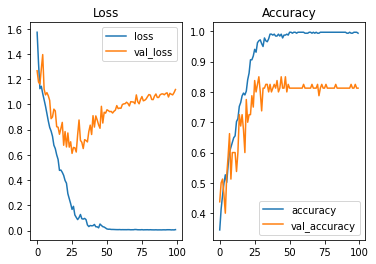

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['loss', 'val_loss'])

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(['accuracy', 'val_accuracy'])

plt.show()

### Performance metrics

### Accuracy

In [ ]:
model.evaluate(X_test_scaled, y_test, return_dict=True)

6/6 [==============================] - 0s 2ms/step - loss: 1.0083 - accuracy: 0.8488


{'accuracy': 0.8488371968269348, 'loss': 1.0083247423171997}

### Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_scaled)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80        68
           1       0.75      0.97      0.85        34
           2       0.80      0.95      0.87        42
           3       0.80      0.89      0.84         9
           4       0.95      0.95      0.95        19

    accuracy                           0.85       172
   macro avg       0.85      0.89      0.86       172
weighted avg       0.87      0.85      0.85       172



### Confusion matrix

In [ ]:
cm = confusion_matrix(y_test_class, y_pred_class)
cm

array([[47,  9,  9,  2,  1],
       [ 1, 33,  0,  0,  0],
       [ 1,  1, 40,  0,  0],
       [ 0,  0,  1,  8,  0],
       [ 0,  1,  0,  0, 18]])

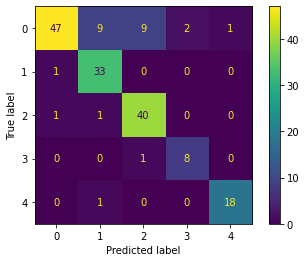

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot()
plt.show()

### ROC curve

#### Area under the ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, multi_class = 'ovo')

0.9671822902558229

#### Plot of ROC curve

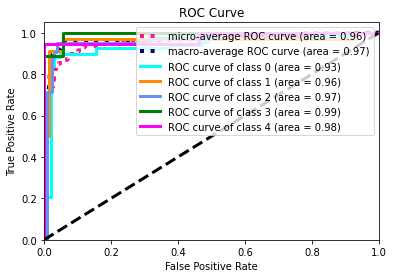

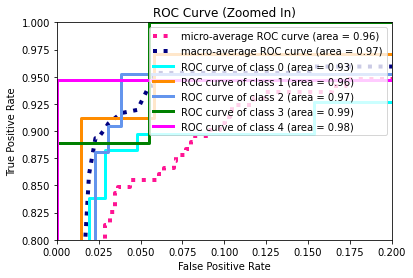

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from numpy import interp
from itertools import cycle

n_classes = 5

# Plot linewidth.
lw = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Zoomed In)')
plt.legend(loc="upper right")
plt.show()

## Save model and scaler

In [ ]:
model.save("model.h5")

In [ ]:
import joblib
joblib.dump(ct, 'scaler.pkl')

['scaler.pkl']